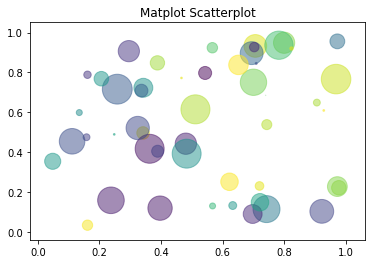

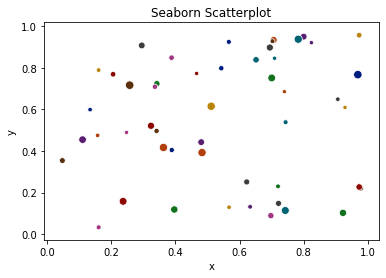

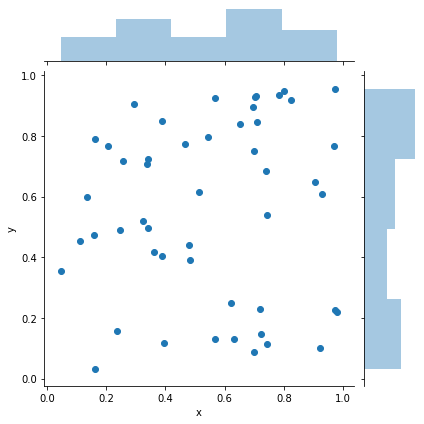

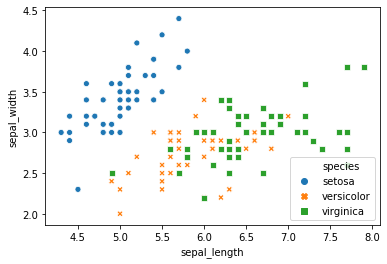

In [1]:
#A nice discussion about differences between Matplotlib and Seaborn:
#https://www.quora.com/What-is-the-difference-between-Matplotlib-and-Seaborn-Which-one-should-I-learn-for-studying-data-science

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fixing random state for reproducibility
np.random.seed(19680801)

N = 50 #N=50 data points
x = np.random.rand(N) #x position of 50 data points: rand(N) created N value in range[0;1]
y = np.random.rand(N) # y position of 50 data points

colors = np.random.rand(N) #colors of 50 data points
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

#Matplot ScatterPlot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Matplot Scatterplot')
plt.show()

#Create a dataframe for seaborn
xy= np.vstack((x, y)).T   #combine and transpose the two arrays
df = pd.DataFrame(xy,columns=['x','y'])
#Some Seaborn ScatterPlot variations
ax= sns.scatterplot(x='x', y='y', hue=colors, palette='dark', size=area, legend=False,data=df).set_title("Seaborn Scatterplot")
plt.show()

sns.jointplot(x="x", y="y", data=df)
plt.show()

iris = sns.load_dataset("iris")
ax = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width, hue=iris.species, style=iris.species)
plt.show()

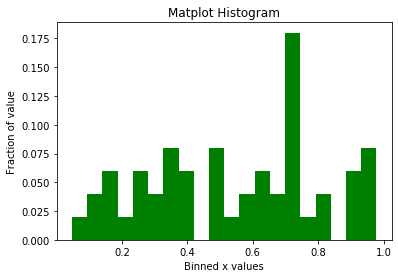

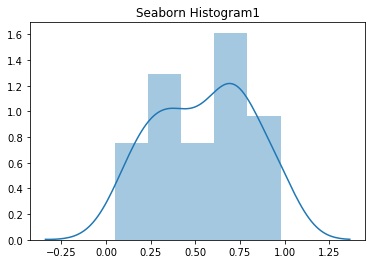

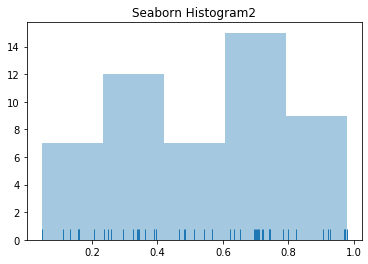

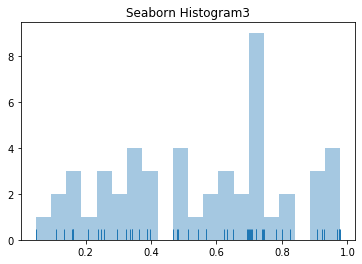

In [2]:
#Histogram example using some of the optional parameters
#weights:An array of weights, of the same shape as x. Each value in x only contributes its associated weight 
#towards the bin count (instead of 1), so with N=50, each value contributes 0.02 resulting in relative values
#in the histogram
plt.hist(x,bins=20,weights=np.zeros_like(x) + 1. / x.size,color='g')
plt.xlabel('Binned x values')
plt.ylabel('Fraction of value')
plt.title('Matplot Histogram')
plt.show()

#Some Seaborn Histogram variations
ax1= sns.distplot(x).set_title("Seaborn Histogram1")
plt.show()
ax2= sns.distplot(x, kde=False, rug=True).set_title("Seaborn Histogram2")
plt.show()
sns.distplot(x, bins=20, kde=False, rug=True).set_title("Seaborn Histogram3")
plt.show()

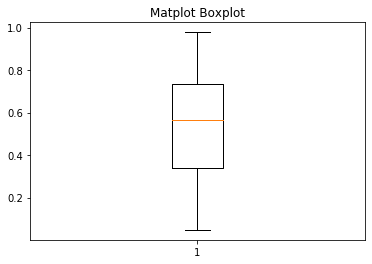

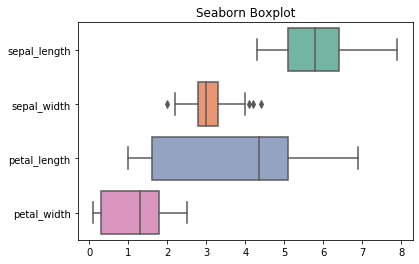

In [3]:
# Most simple boxplot example with the values of x
plt.boxplot(x)
plt.title('Matplot Boxplot')
plt.show()

#Seaborn boxplot example using Iris dataset
iris = sns.load_dataset("iris")
ax = sns.boxplot(data=iris, orient="h", palette="Set2").set_title("Seaborn Boxplot")

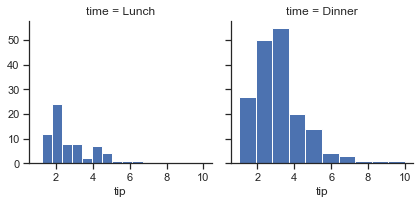

In [4]:
#Combining multiple plots with Seaborn
#https://seaborn.pydata.org/tutorial/axis_grids.html
sns.set(style="ticks")

tips = sns.load_dataset("tips")
#FacetGrid is useful when you want to visualize the distribution of a variable or the relationship between 
#multiple variables separately within subsets of your dataset
g = sns.FacetGrid(tips, col="time")
#Map plots the values of a given feature (second parameter) in a defined plot (first parameter)
g.map(plt.hist, "tip");


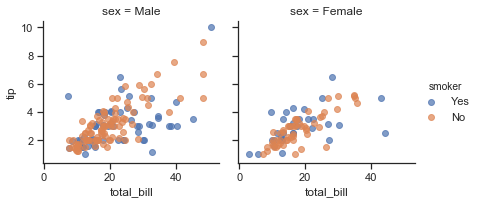

In [5]:
# Scatter plots with two numerical features (for the dots in the scatter) 
# and two categorical (visualized by different plots and colors)
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

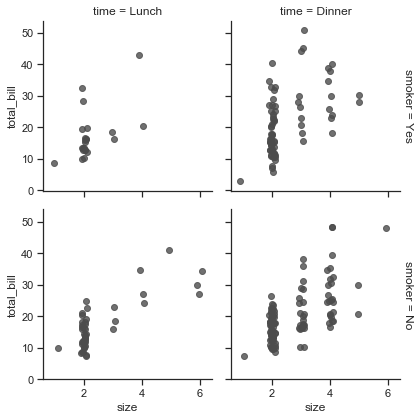

In [6]:
#2x2 design using columns AND rows:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);